In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

from sklearn.mixture import GaussianMixture
from sklearn import metrics

In [3]:
data = pd.read_csv('xclara.csv')
data

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
...,...,...
2995,85.652800,-6.461061
2996,82.770880,-2.373299
2997,64.465320,-10.501360
2998,90.722820,-12.255840


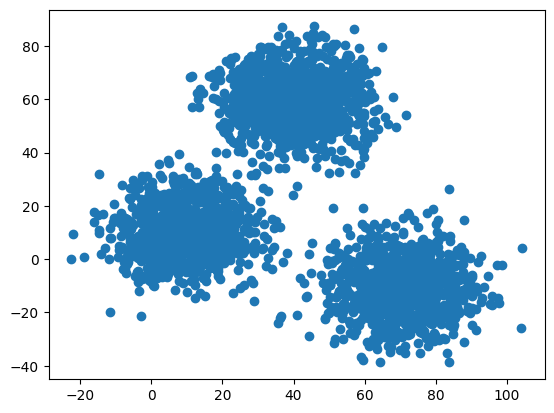

In [6]:
plt.scatter(data.V1, data.V2)
plt.show()

In [7]:
list_sil = []
K = range(2,8)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(data)
    labels = gmm.predict(data)
    sil = metrics.silhouette_score(data, labels, metric='euclidean')
    list_sil.append(sil)

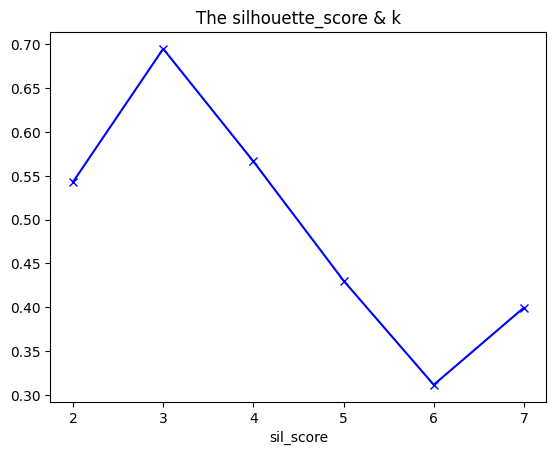

In [8]:
plt.plot(K,list_sil, 'bx-')
plt.xlabel('k')
plt.xlabel('sil_score')
plt.title('The silhouette_score & k')
plt.show()


In [ ]:
#=> Select k = 3

In [11]:
model =  GaussianMixture(n_components=3, max_iter=200, random_state=0)
model.fit(data)

GaussianMixture(max_iter=200, n_components=3, random_state=0)

In [12]:
print(gmm.weights_)

[0.11732585 0.30038429 0.167536   0.09431833 0.1497211  0.08575742
 0.08495701]


In [13]:
print(gmm.means_)

[[ 45.75929755  64.85032681]
 [  9.53423235  10.73740002]
 [ 63.96436037 -10.14663739]
 [ 31.94619324  65.63963924]
 [ 76.60150034 -10.08757787]
 [ 48.10066019  52.77774917]
 [ 35.9638632   53.21892777]]


In [14]:
print(gmm.covariances_)

[[[ 48.42383612  11.06242716]
  [ 11.06242716  53.35147434]]

 [[105.1814142    4.22938702]
  [  4.22938702  97.66833896]]

 [[ 68.94749243   3.1677668 ]
  [  3.1677668  108.03186956]]

 [[ 65.47475984  11.44178104]
  [ 11.44178104  59.65783081]]

 [[ 70.25666093  -4.78361902]
  [ -4.78361902 104.67747886]]

 [[ 66.81527454  -1.39844992]
  [ -1.39844992  64.18635315]]

 [[ 58.52574609   6.23784699]
  [  6.23784699  48.37935601]]]


In [16]:
types = gmm.predict(data) # 0, 1, 2

In [17]:
X_now = np.array([[0.4, 1.5], [1.6, 4.5], [2, 5.7]]) 
y_now = gmm.predict(X_now)
y_now

C:\Program Files\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


array([1, 1, 1], dtype=int64)

C:\Program Files\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


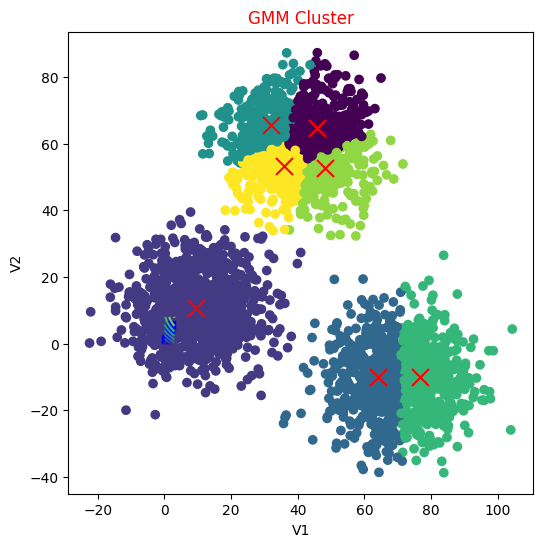

In [24]:
plt.figure(figsize=(6,6))
X, Y = np.meshgrid (np.linspace(0, 3), np.linspace(0,8)) 
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(data['V1'], data['V2'], c=types) 
plt.scatter(X_now[:,0], X_now[:,1], marker="s", c='b')
plt.scatter(gmm. means_[:,0], gmm.means_[:,1], color="red", marker='x', s=150)
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("GMM Cluster", color="red")
plt.show()